In [1]:
%matplotlib inline

from functions_SIS_SIR_dynamicAR import *
from functions_KF_dynamicAR import * 

# Generate Dynamic AR signal

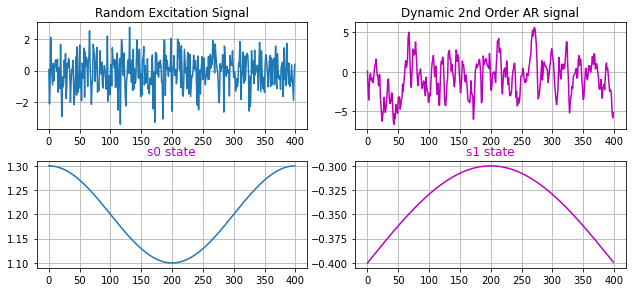

In [2]:
# Length of time series
N=400

signal_model = dynamic_2nd_AR_(N)

signal_model.generate_signal()
S = signal_model.S
ex = signal_model.ex
A = signal_model.A

signal_model.plot()

In [3]:
# Initial state values
s0 = 1.3
s1 = -0.4

# Parameters for Kalman Filter

In [4]:
# Initial state
theta_n1_n1 = np.array([[s0],[s1]])

# Initial covariance
P_n1_n1 =  0.1*np.identity(2) #larger value gives faster convergence

# Process noise
Q = 0.01*np.eye(2)

# Measurement noise
R = np.cov(ex)

# Parameters for SIS and SIR

In [5]:
T = N

# Number of samples
L = 200

# Initial state
z_init = [s0,s1]

# Process noise
Q = Q

# Measurement noise
R_std = np.std(ex)

# Kalman Filter (KF)

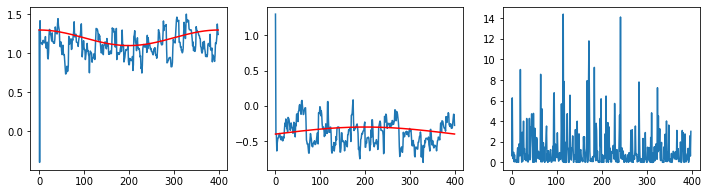

In [6]:
KF = kalman_filter(N, S, theta_n1_n1, P_n1_n1, Q, R,A)

KF.train()

theta0 = KF.theta0
theta1 = KF.theta1

KF_predictions = np.zeros((N,2))

for i in range(len(theta0)):
    KF_predictions[i][0] = theta0[i]
    KF_predictions[i][1] = theta1[i]

KF.plot()

# Sequential Importance Sampling (SIS)

100% |########################################################################|


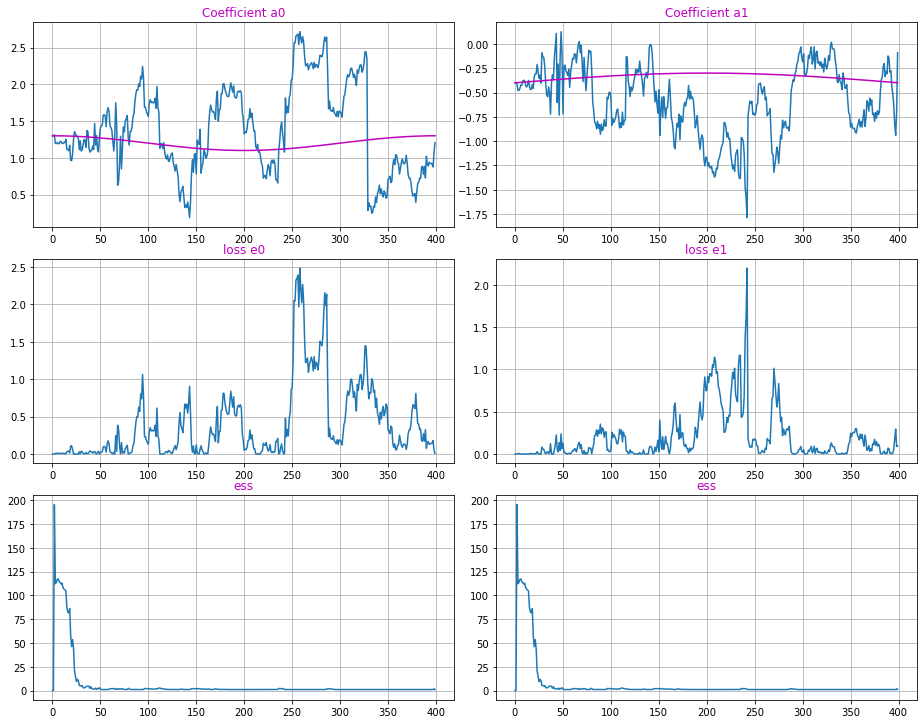

In [7]:
SIS = particle_filter(T, L, Q, R_std, S, z_init, A)
SIS.train()
SIS.predict()

SIS_predictions = SIS.z
SIS_ess = SIS.ess

SIS.plot()

# Sequential Importance Resampling (SIR)

100% |########################################################################|


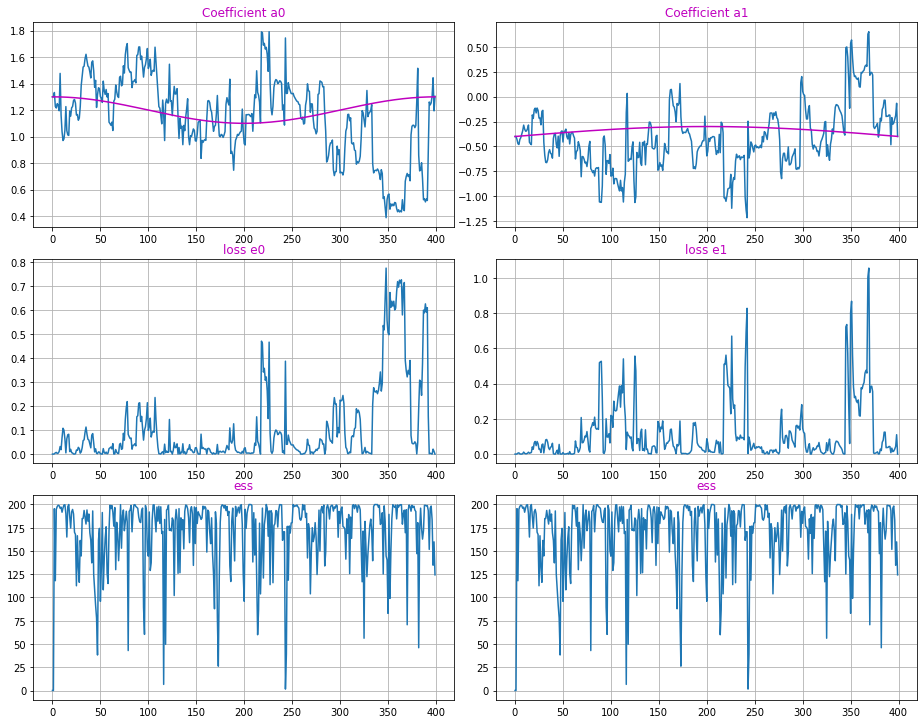

In [8]:
SIR = particle_filter(T, L, Q, R_std, S, z_init, A)
SIR.train(resample = True)
SIR.predict()

SIR_predictions = SIR.z
SIR_ess = SIR.ess

SIR.plot()

# Plot KF, SIS, SIR

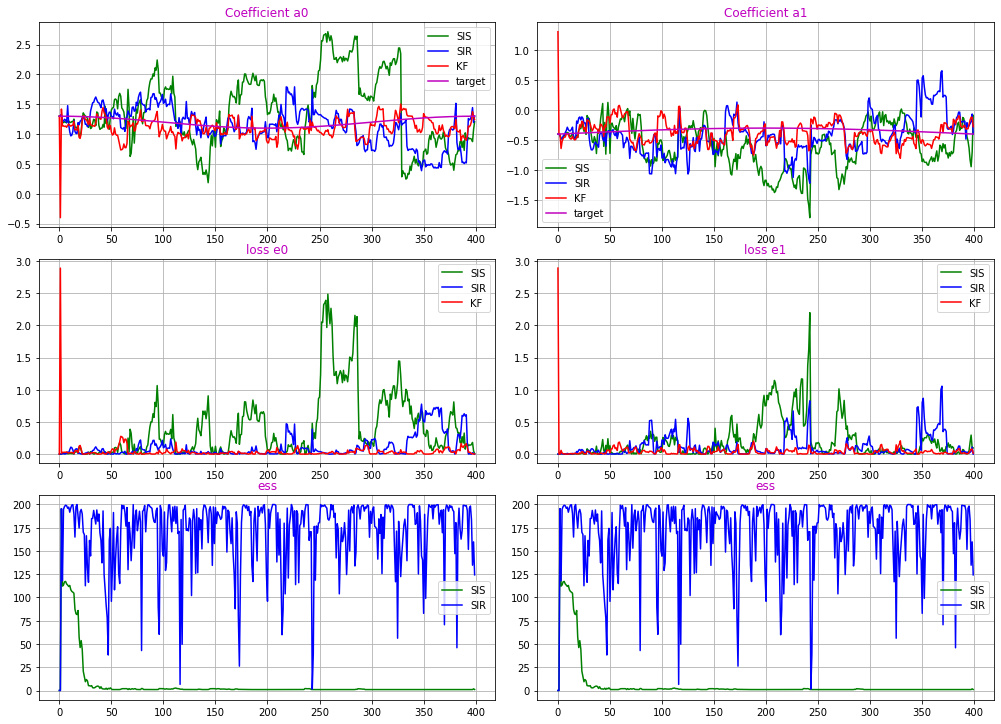

In [9]:
titles = ['SIS','SIR','KF','target']
colour = ['green','blue','red']

predictions = [SIS_predictions, SIR_predictions, KF_predictions]
ess = [SIS_ess, SIR_ess]

plot(predictions, titles, T, A, ess,colour)

# Weights of all samples at each training iteration for SIS

In [10]:
SIS_w = SIS.ws

SIS_weights = []
samples = []
timesteps = []

for i in range(len(SIS_w)):
    for k in range(len(SIS_w)):
        SIS_weights.append(SIS_w)
        timesteps.append(i)
        samples.append(k)


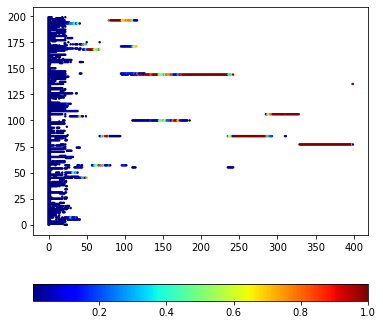

In [11]:
SIS_w = SIS.ws

samples = []
weights = []
timesteps = []

for n in range(len(SIS_w)):
    for s in range(len(SIS_w[n])):
        if SIS_w[n][s] >= 1/L:
            weights.append(SIS_w[n][s])
            samples.append(s)
            timesteps.append(n)
SIS.ws.shape

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)

sc = plt.scatter(timesteps,samples, s = 2, c=weights, cmap=plt.cm.jet)

cbar = fig.colorbar(sc, orientation='horizontal')    

plt.show()